In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()


Saving SBIN_15min_FINAL.csv to SBIN_15min_FINAL.csv


In [4]:
raw_data=pd.read_csv('SBIN_15min_FINAL.csv')

In [5]:
uploaded

{'SBIN_15min_FINAL.csv': b'Datetime,Open,High,Low,Close,Volume,EMA\r\n2021-04-26 09:15:00+05:30,339.25,346.35,339.25,345.35,7715118,0\r\n2021-04-26 09:30:00+05:30,345.5,346.5,345,345.05,3010818,0\r\n2021-04-26 09:45:00+05:30,345.1,346.25,345,345.9,2390991,0\r\n2021-04-26 10:00:00+05:30,345.85,346.35,344.25,344.5,2074132,0\r\n2021-04-26 10:15:00+05:30,344.45,345.2,344.05,345.1,1476206,0\r\n2021-04-26 10:30:00+05:30,345.15,346.7,344.35,346,2858358,0\r\n2021-04-26 10:45:00+05:30,345.95,346.2,345.1,345.7,1041426,0\r\n2021-04-26 11:00:00+05:30,345.8,347.35,345.65,346.5,2296107,0\r\n2021-04-26 11:15:00+05:30,346.55,347,345.9,345.9,1302639,0\r\n2021-04-26 11:30:00+05:30,346.05,346.95,345.7,346.55,1418870,0\r\n2021-04-26 11:45:00+05:30,346.55,346.8,345.55,346.4,1309190,0\r\n2021-04-26 12:00:00+05:30,346.5,346.55,345.7,346.35,1235179,0\r\n2021-04-26 12:15:00+05:30,346.35,346.7,345.4,345.9,1639284,0\r\n2021-04-26 12:30:00+05:30,345.95,345.95,345,345.3,1627619,0\r\n2021-04-26 12:45:00+05:30,345.3

In [6]:
raw_data

,Datetime,Open,High,Low,Close,Volume,EMA
0,2021-04-26 09:15:00+05:30,339.25,346.35,339.25,345.35,7715118,0
1,2021-04-26 09:30:00+05:30,345.50,346.50,345.00,345.05,3010818,0
2,2021-04-26 09:45:00+05:30,345.10,346.25,345.00,345.90,2390991,0
3,2021-04-26 10:00:00+05:30,345.85,346.35,344.25,344.50,2074132,0
4,2021-04-26 10:15:00+05:30,344.45,345.20,344.05,345.10,1476206,0
...,...,...,...,...,...,...,...
6299,2022-04-29 14:15:00+05:30,503.45,503.70,501.30,502.85,412459,0
6300,2022-04-29 14:30:00+05:30,502.70,503.40,501.75,502.40,313785,0
6301,2022-04-29 14:45:00+05:30,502.40,503.00,501.35,502.30,249663,0
6302,2022-04-29 15:00:00+05:30,502.45,502.45,495.10,496.00,1904521,0


In [7]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [8]:
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [9]:
print(raw_data.shape)
raw_data.head()

(6304, 7)


,time,open,high,low,close,volume,EMA
0,2021-04-26 09:15:00,339.25,346.35,339.25,345.35,7715118,0
1,2021-04-26 09:30:00,345.50,346.50,345.00,345.05,3010818,0
2,2021-04-26 09:45:00,345.10,346.25,345.00,345.90,2390991,0
3,2021-04-26 10:00:00,345.85,346.35,344.25,344.50,2074132,0
4,2021-04-26 10:15:00,344.45,345.20,344.05,345.10,1476206,0


In [10]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

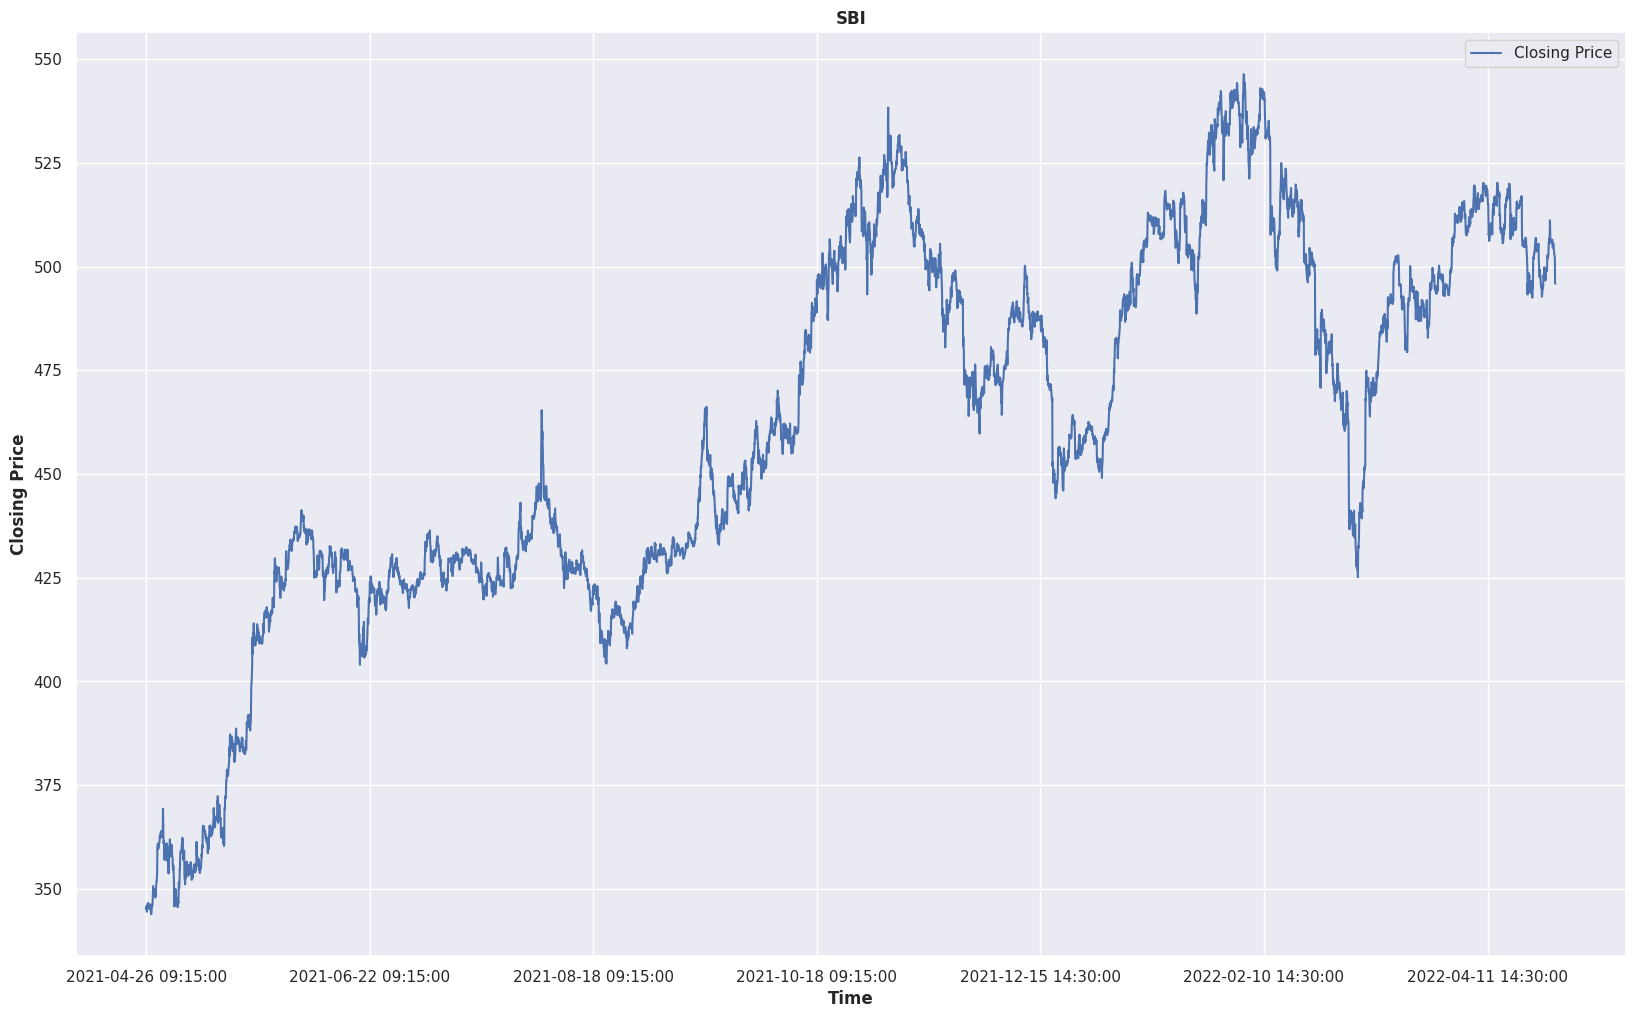

In [11]:
close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.title("SBI", fontweight='bold')
plt.legend(['Closing Price'])

In [12]:
from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):

  time_format = "%Y-%m-%d %H:%M:%S"

  sum_pv = 0
  sum_volume = 0

  vwap = []

  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):

    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [13]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6304
 Days 10 
 Length of prices 6304
 Length of EMA list 6294
len ema = 6294
len vwap = 6304


In [14]:
# make all ema, vwap, prices lists of equal length
price = price[-len(ema):]
vwap = vwap[-len(ema):]

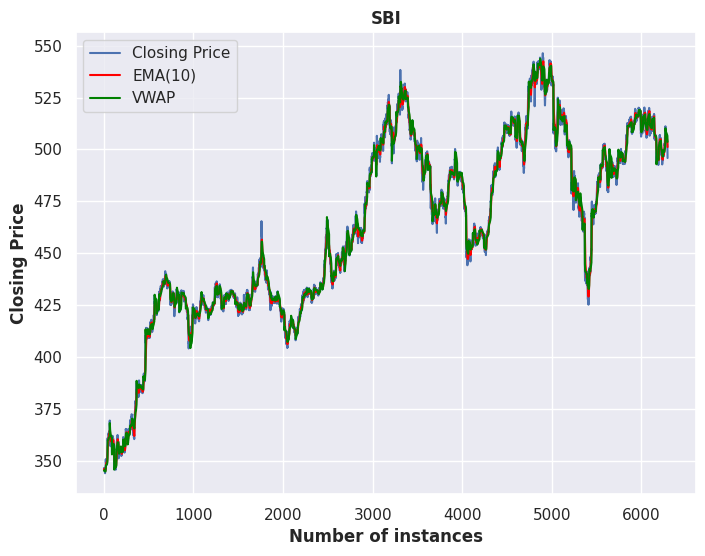

In [16]:
plt.figure(figsize=(8,6))
plt.title("SBI", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [17]:
# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [18]:
ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[345.79045455 345.14752765 346.4       ]
 [345.89219008 345.19374295 346.35      ]
 [345.89361007 345.23814198 345.9       ]
 ...
 [503.7537012  506.52153192 502.3       ]
 [502.34393735 505.01845884 496.        ]
 [501.16322147 503.62367171 495.85      ]]


In [19]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(6292, 3, 3) (6292,)
[[345.79045455 345.14752765 346.4       ]
 [345.89219008 345.19374295 346.35      ]
 [345.89361007 345.23814198 345.9       ]] 345.9


In [20]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4404, 3, 3)
(4404,)
(1888, 3, 3)
(1888,)


In [21]:
X_test

array([[[497.08858888, 498.24312411, 494.9       ],
        [496.50884545, 498.07104945, 493.9       ],
        [496.17996446, 497.82700761, 494.7       ]],

       [[496.50884545, 498.07104945, 493.9       ],
        [496.17996446, 497.82700761, 494.7       ],
        [495.3017891 , 497.5454426 , 491.35      ]],

       [[496.17996446, 497.82700761, 494.7       ],
        [495.3017891 , 497.5454426 , 491.35      ],
        [494.41964563, 497.07513225, 490.45      ]],

       ...,

       [[504.44935612, 506.79518714, 502.85      ],
        [504.07674591, 506.64320282, 502.4       ],
        [503.7537012 , 506.52153192, 502.3       ]],

       [[504.07674591, 506.64320282, 502.4       ],
        [503.7537012 , 506.52153192, 502.3       ],
        [502.34393735, 505.01845884, 496.        ]],

       [[503.7537012 , 506.52153192, 502.3       ],
        [502.34393735, 505.01845884, 496.        ],
        [501.16322147, 503.62367171, 495.85      ]]])

In [22]:
print(X_test)

[[[497.08858888 498.24312411 494.9       ]
  [496.50884545 498.07104945 493.9       ]
  [496.17996446 497.82700761 494.7       ]]

 [[496.50884545 498.07104945 493.9       ]
  [496.17996446 497.82700761 494.7       ]
  [495.3017891  497.5454426  491.35      ]]

 [[496.17996446 497.82700761 494.7       ]
  [495.3017891  497.5454426  491.35      ]
  [494.41964563 497.07513225 490.45      ]]

 ...

 [[504.44935612 506.79518714 502.85      ]
  [504.07674591 506.64320282 502.4       ]
  [503.7537012  506.52153192 502.3       ]]

 [[504.07674591 506.64320282 502.4       ]
  [503.7537012  506.52153192 502.3       ]
  [502.34393735 505.01845884 496.        ]]

 [[503.7537012  506.52153192 502.3       ]
  [502.34393735 505.01845884 496.        ]
  [501.16322147 503.62367171 495.85      ]]]


In [23]:
print(y_test)

[494.7  491.35 490.45 ... 502.3  496.   495.85]


In [24]:
# flattening input for model feeding

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [25]:
# Model training

from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0003))
model_lstm_vanilla.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 3, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_bidirectional.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100)                 │          21,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,701 (84.77 KB)

 Trainable params: 21,701 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 4s - 30ms/step - loss: 23781.1973 - val_loss: 19.2369
Epoch 2/50
138/138 - 0s - 2ms/step - loss: 7.8771 - val_loss: 18.3371
Epoch 3/50
138/138 - 1s - 5ms/step - loss: 7.8300 - val_loss: 18.1880
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 7.7866 - val_loss: 18.4698
Epoch 5/50
138/138 - 1s - 5ms/step - loss: 7.7271 - val_loss: 17.6567
Epoch 6/50
138/138 - 1s - 4ms/step - loss: 7.5936 - val_loss: 17.3004
Epoch 7/50
138/138 - 0s - 3ms/step - loss: 7.4947 - val_loss: 16.9927
Epoch 8/50
138/138 - 1s - 5ms/step - loss: 7.3543 - val_loss: 16.6306
Epoch 9/50
138/138 - 0s - 4ms/step - loss: 5.7586 - val_loss: 9.1108
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 4.4134 - val_loss: 7.6846
Epoch 11/50
138/138 - 1s - 4ms/step - loss: 4.0902 - val_loss: 7.5024
Epoch 12/50
138/138 - 1s - 4ms/step - loss: 3.9749 - val_loss: 8.7219
Epoch 13/50
138/138 - 1s - 5ms/step - loss: 3.8660 - val_loss: 7.1960
Epoch 14/50
138/138 - 1s - 4ms/step - loss: 3.6880 - val_loss: 8.4959
Epoch 15/50
138/

In [29]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 6s - 44ms/step - loss: 58312.3359 - val_loss: 4.7885
Epoch 2/50
138/138 - 2s - 12ms/step - loss: 2.1273 - val_loss: 4.0639
Epoch 3/50
138/138 - 1s - 4ms/step - loss: 1.9023 - val_loss: 2.8424
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 1.6108 - val_loss: 3.5064
Epoch 5/50
138/138 - 1s - 4ms/step - loss: 1.7884 - val_loss: 2.4902
Epoch 6/50
138/138 - 1s - 4ms/step - loss: 1.6071 - val_loss: 2.6383
Epoch 7/50
138/138 - 1s - 4ms/step - loss: 1.2847 - val_loss: 2.9542
Epoch 8/50
138/138 - 1s - 4ms/step - loss: 0.9500 - val_loss: 2.0107
Epoch 9/50
138/138 - 1s - 5ms/step - loss: 1.0468 - val_loss: 1.6127
Epoch 10/50
138/138 - 0s - 3ms/step - loss: 0.8757 - val_loss: 1.4185
Epoch 11/50
138/138 - 1s - 4ms/step - loss: 0.6789 - val_loss: 1.2471
Epoch 12/50
138/138 - 1s - 4ms/step - loss: 0.6944 - val_loss: 1.1602
Epoch 13/50
138/138 - 1s - 4ms/step - loss: 0.5481 - val_loss: 0.8310
Epoch 14/50
138/138 - 0s - 3ms/step - loss: 0.5913 - val_loss: 1.0142
Epoch 15/50
138/138 - 1

In [30]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 5s - 38ms/step - loss: 51982.7734 - val_loss: 27.3730
Epoch 2/50
138/138 - 2s - 18ms/step - loss: 6.5718 - val_loss: 8.9283
Epoch 3/50
138/138 - 1s - 4ms/step - loss: 5.8926 - val_loss: 8.9683
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 5.8632 - val_loss: 8.6856
Epoch 5/50
138/138 - 1s - 5ms/step - loss: 5.7825 - val_loss: 8.7215
Epoch 6/50
138/138 - 1s - 5ms/step - loss: 5.7254 - val_loss: 8.6498
Epoch 7/50
138/138 - 1s - 8ms/step - loss: 5.6651 - val_loss: 8.5008
Epoch 8/50
138/138 - 0s - 3ms/step - loss: 5.6023 - val_loss: 8.3092
Epoch 9/50
138/138 - 1s - 4ms/step - loss: 5.5695 - val_loss: 8.2388
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 5.4652 - val_loss: 8.2293
Epoch 11/50
138/138 - 1s - 4ms/step - loss: 5.3076 - val_loss: 8.0262
Epoch 12/50
138/138 - 1s - 4ms/step - loss: 5.1455 - val_loss: 7.6980
Epoch 13/50
138/138 - 0s - 3ms/step - loss: 4.9929 - val_loss: 7.5699
Epoch 14/50
138/138 - 1s - 4ms/step - loss: 4.8951 - val_loss: 7.1479
Epoch 15/50
138/138 - 

Text(0, 0.5, 'MSE')

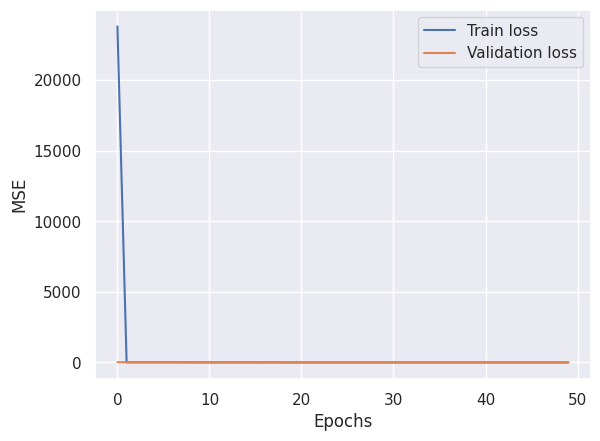

In [31]:
# plots
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

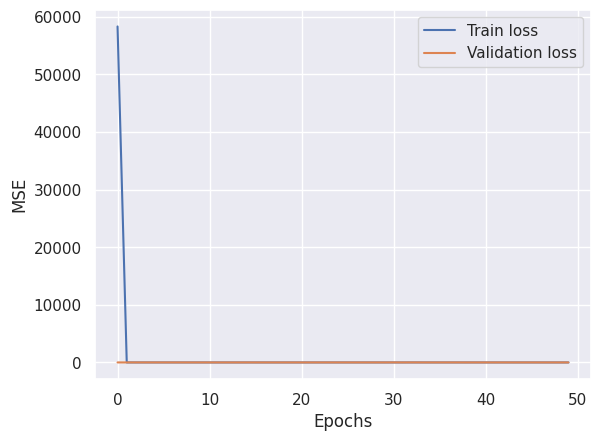

In [32]:
# plots
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

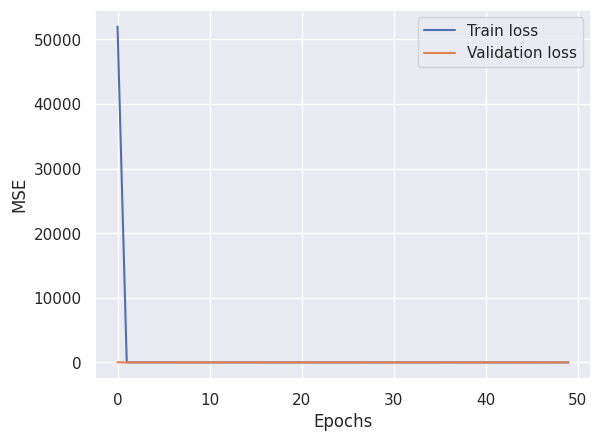

In [33]:
# plots
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [34]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for vanilla: 1.673207545260142
Test rmse for vanilla: 2.0125331240762816
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for stacked: 1.0041817942835887
Test rmse for stacked: 1.2841066137266235
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for bidirectional: 0.8129932452296623
Test rmse for bidirectional: 1.079671715672353


In [35]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[494.7  491.35 490.45 490.45 490.7  491.5  492.35 490.45 491.4  491.45]
[[495.86618]
 [495.1867 ]
 [493.03937]
 [492.31036]
 [492.32925]
 [492.56372]
 [493.1148 ]
 [493.04834]
 [492.36438]
 [492.70917]]


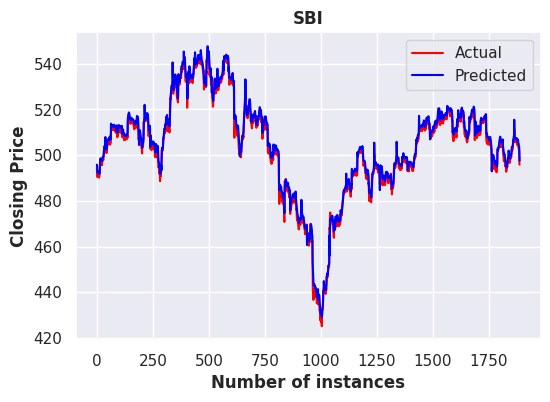

In [37]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("SBI", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

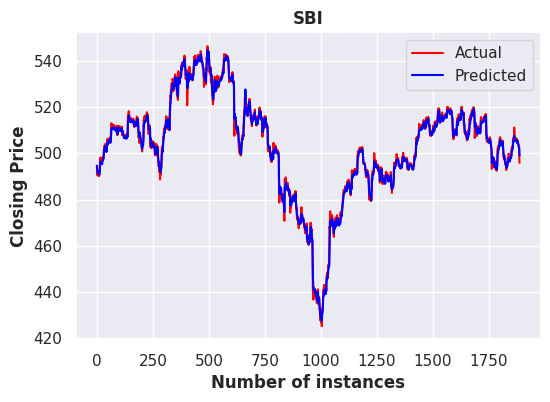

In [39]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("SBI", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

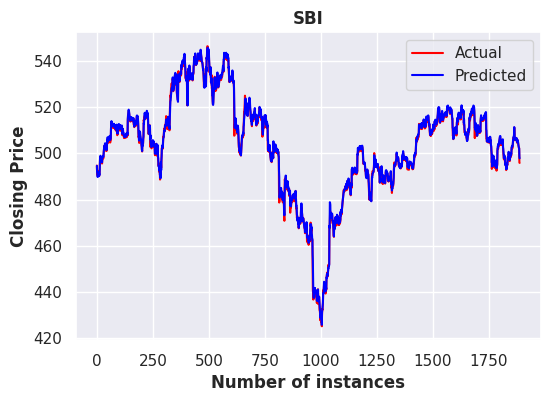

In [40]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("SBI", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])